# Creating and Detecting Magnetic fields

In [1]:
% setup MRI-education-resources path and requirements
cd ../
startup

loading image
loading signal


## Loop currents and magnetic fields
Magnetic fields, $\vec{B}$, can be created by current, $I$, through loop of wire, where the "left-hand rule" determines the direction of the magnetic field

![loop%20small%20current.png](images/loop_small_current.png)

By increasing the current, the magnetic field is increased

![loop%20big%20current.png](images/loop_big_current.png)

We can also link many loops together (a “solenoid”) to increase the extent of the magnetic field.

![solenoid%20small%20current.png](images/solenoid_small_current.png)

A solenoid design is typically used to create the main magnetic field for MRI, $B_0$, to create a large region in space with a homogeneous magnetic field, as required for MRI across a volume.
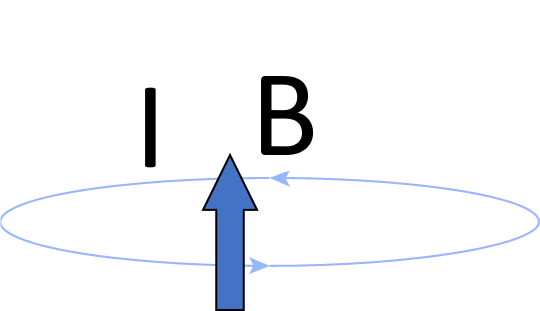
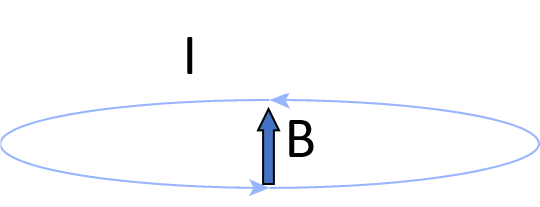
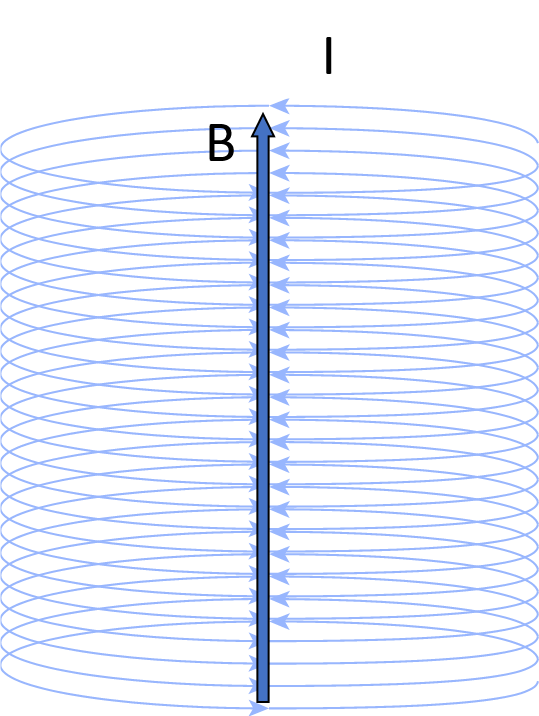

## Creating Radiofrequency (RF) waves

RF fields, used for excitation in MRI, can be created by oscillating currents at the desired radio-frequency.

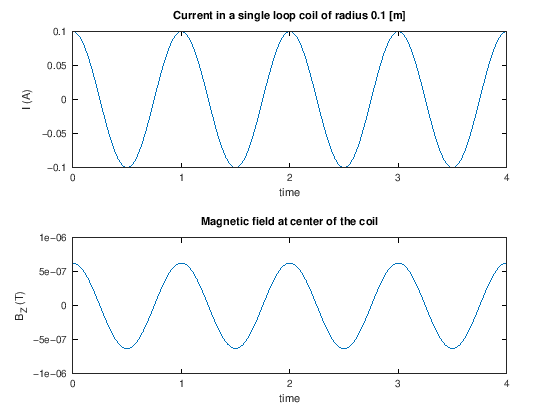

In [2]:
R = .1; % coil radius [m]
I0 = 0.1; % current amplitude [amps]
mu0 = 4*pi*1e-7; % T⋅m/A; 

t = linspace(0,4, 401);
I = cos(2*pi*t) * I0;


BZ = mu0 * I / (2*R);    % magnetic field at the center of a single loop

subplot(211)
plot(t,I)
ylabel('I (A)')
xlabel('time')
title(['Current in a single loop coil of radius ' num2str(R) ' [m]'])
subplot(212)
plot(t,BZ)
ylabel('B_Z (T)')
xlabel('time')
title(['Magnetic field at center of the coil'])


When this is performed at the Larmor frequency, this creates RF excitation.

## Receiving Magnetic Resonance Signal

Magnetic resonsance signal is received by the following sequence of events

1. Spins and the net magnetization, $\vec{M}$, in a magnetic field will precess at the Larmor frequency, which depends on the gyromagnetic ratio and main magnetic field: $\omega_0 = \gamma B_0$
1. This precession creates oscillating magnetic fields at this same (Larmor) frequency.
1. Oscillating magnetic fields will create oscillating current in loops of wire, which can be detected by amplifying and digitizing this signal

![RF%20reception.gif](images/RF_reception.gif)


This is the recipricol of creating RF waves as above.  To create RF waves, oscillating currents are generated in a coil to create an oscillating magnetic field.  To receive RF waves, an oscillating magnetic field creates oscillating currents generated in a coil that can be measured.

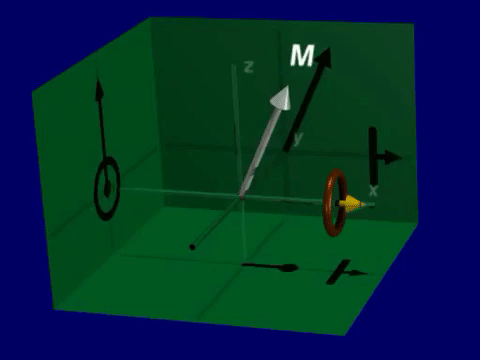

## RF System

The purpose of the RF system is to
1. Excitation – transmit RF at resonance frequency to perturb the net magnetization from equilibrium
1. Reception – receive signals arising from net magnetization rotating at the resonance frequency

It consists of two main systems for these two tasks.  All components are tuned to Larmor frequency, meaning they are most sensitive to transmitting or receiving signals at this frequency.  Reactive components (capacitors and inductors) are used for tuning to the correct frequency.

### Transmit (Tx) system for excitation

- Transmit high power (10s of kW) RF signals
- Key requirement is homogeneity, i.e. same magnetic field that creates the same flip angle across imaging FOV
- Usually a single larger, coil surrounding entire FOV


### Receive (Rx) system for reception

- Receive small signals (mV) arising from body
- Key requirement is high sensitivity to detect small signals with the least noise
- Usually an array of smaller coil elements (also known as channels), placed around the body


## RF Coils

### Transmit (Tx) RF coils
- Typically performed with “BODY” coil
- Birdcage design
- Provides homogeneous magnetic field amplitude
- Creates magnetic fields perpendicular to B0

In MRI we denote transmitted magnetic fields from RF energy as

$$B_1^+(\vec{r},t)$$

This field is typically in units of millitesla (mT) and can vary over space, $\vec{r}$ and time, $t$

![BODY coil](images/BODY_coil.png)

### Receive (Rx) RF coils
- Tailored to the anatomy of interest, e.g. knee coils, abdomen coils, head coils
- Configured in arrays (or "phased arrays")
- Between 8 to 64 individual coil elements (also known as channels) in a array coil is common
- Elements should be relatively isolated and decoupled to not interfere with each other
- Tuned to the Larmor frequency when receiving signals
- Detuned (turned off) when transmit RF is active so they don’t interfere
- *Goal is to provide high sensitivity to receive MR signals by placing them as close as possible to the body*

In MRI we denote senitivity profile to varying magnetic fields of the RF receiver coils as

$$B_{1,n}^-(\vec{r},t)$$

This sensitivity is typically in units of millitesla/Amp (mT/A) and can vary over space, $\vec{r}$, time, $t$, and coil element, $n$, in the array coil.

![Receive array](images/TIM_receive_array.png)
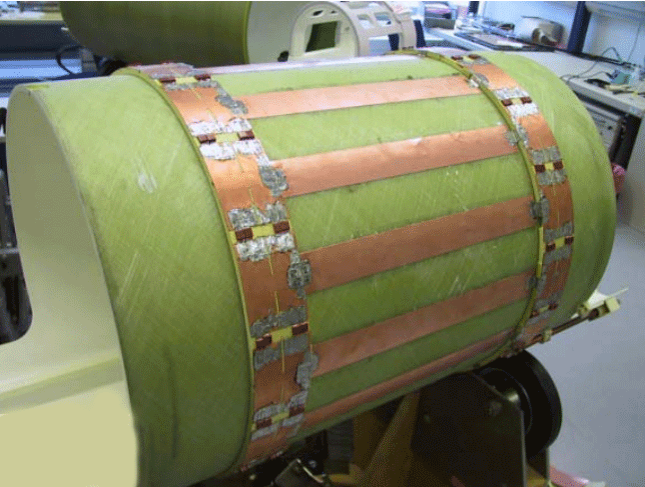
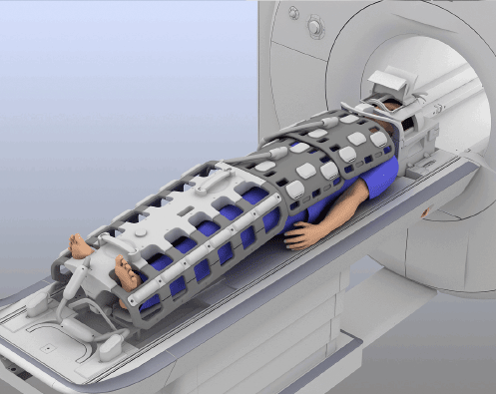

## RF Coil Profiles

### Receive elements

Coil elements are most sensitive to signals originating near the element, and the so-called sensitivity off as we move away from the coil.  The following images show that each element is most sensitive, or has the brightest image, closest to that element:

![Spine Array](images/SpineArray.png)

### Sensitivity Simulation

The following simulates the sensitivity profile of a single loop RF coil varying over space.  In the following plots, the magnetic field vector, $\vec{B}(\vec{r}) = [B_X(\vec{r}), B_Y(\vec{r}), B_Z(\vec{r})]$, that is created by the coil is plotted, as well as the magnetic field amplitude, $\|\vec{B}(\vec{r})\|$. 
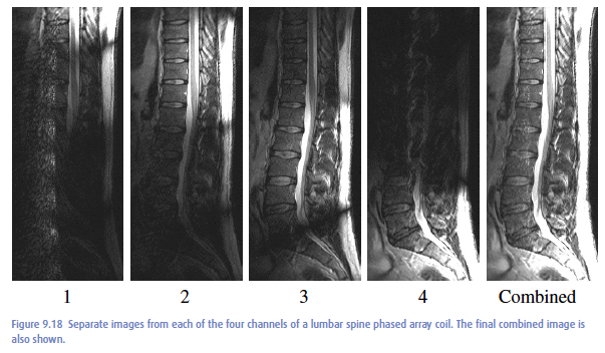

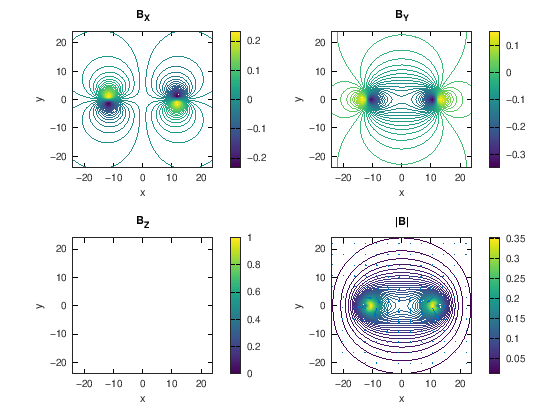

In [3]:
R = 12; % coil radius, cm
I = 3; % current in the coil
flag_2d = 1; % just plot 2D profile

[BX, BY, BZ, xp,yp, zp] = loop_coil_field(R, I, flag_2d);

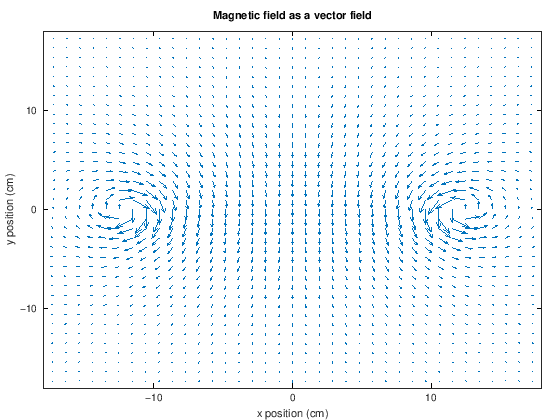

In [4]:
% plot the vector field

quiver(xp,yp, BX, BY, 1.4)
axis([-18 18 -18 18])
xlabel('x position (cm)')
ylabel('y position (cm)')
title('Magnetic field as a vector field')

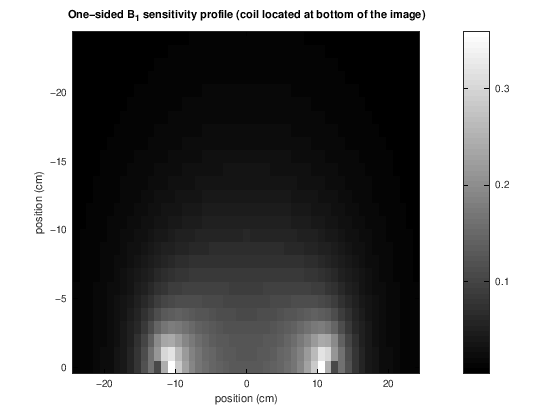

In [5]:
Bmag = sqrt(BX.^2+BY.^2+BZ.^2);
xhalf = round(length(xp)/2);

imagesc(yp, xp(1:xhalf), Bmag(1:xhalf,:))
xlabel('position (cm)')
ylabel('position (cm)')
axis tight
colormap(gray),colorbar
title('One-sided B_1 sensitivity profile (coil located at bottom of the image)')